# Análise de Risco de Crédito

Hoje iremos trabalhar com análise de Risco de Crédito, mais especificamente, faremos um modelo de aprendizado de máquina para nos ajudar com o cálculo do risco que teremos ao liberar crédito ou não para uma pessoa baseada em determinadas características dela tais como sua renda mensal, trabalho atual, destino do dinheiro solicitado e etc.

Em um projeto como esse, é imprescindível passarmos por algumas etapas básicas, e elas são:
- Entendimento do Problema
- Pré-Processamento e análise inicial
- Escolha do modelo de Machine Learning
- Treinamento
- Avaliação de resultados
- Refazer ou reavaliar nossas decisões a depender dos resultados

# Então vamos entender o problema!

### Para quê usamos análise de risco de crédito?
Basicamente, em instituições que concedem crédito, precisamos ter o máximo de certeza que seremos pagos no futuro, e para isso usamos modelos que análisam quais são as chances de um determinado cliente não nos fazer o pagamento até o final do prazo estipulado. Um exemplo disso é o Serasa Score, que cria uma pontuação para você se baseando na pontualidade de seus pagamentos.

### O que exatamente analisaremos?
Todo o nosso trabalho aqui será feito em cima de um [dataset retirado do site de competições Kaggle](https://www.kaggle.com/datasets/laotse/credit-risk-dataset), no qual temos determinadas informações sobre determinados clientes, como idade, salário, como é a situação habitacional dessa pessoa (se vive de aluguel, hipoteca ou tem casa própria), quantidade de dinheiro que pediu no empréstimo e o principal: se ela pagou ou não.

### Como faremos isso?
Primeiramente iremos fazer uma limpeza nos nossos dados, ou seja, vamos procurar por anomalias (uma pessoa cuja idade esteja definida como 200 é uma anomalia, por exemplo) e valores faltantes, e então decidir como iremos tratá-los. 
Após isso, iremos decidir qual algorítimo é o mais recomendado para se lidar com essa situação, em seguida, dividir o nosso conjunto em dois sub-conjuntos, um que servirá para treino e outro para teste, alimentaremos nosso modelo no sub-conjunto de treino e então analisaremos sua eficácia no conjunto de teste.


.
# Vamos para a limpeza dos dados




Primeiramente, vamos entender o nosso conjunto de dados, com cada linha sendo uma pessoa e cada coluna representando uma determinada característica dessa pessoa.
Para fins de esclarecimento, [esse dataset foi retirado do site de competições Kaggle](https://www.kaggle.com/datasets/laotse/credit-risk-dataset).

In [5]:
import pandas as pd
df = pd.read_csv('credit_risk_dataset.csv')
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


![Descrição](images/description_table.png)

Aqui temos uma váriavel muito importante que será nosso alvo: loan_status. Essa é a variável que nos diz se essa pessoa não cumpriu com a operação (valor 1) ou se cumpriu (valor 0).
Agora, iremos realizar um processo chamado de profiling, que é fazer uma análise a qual nos dará uma ideia da qualidade dos nossos dados, isto é, saber se existem dados faltantes, e em caso positivo, quantos faltam, detectar anormalidades nos dados que possam ter sido causadas por erro de entrada e etc.

Primeiramente, vamos em busca de dados faltantes, e para isso utilizaremos a biblioteca Missingno, que nos dá um relatório sobre os dados que faltam e em quais colunas esses dados faltantes se concentram

In [3]:
import missingno as msno

NumExpr defaulting to 4 threads.


<AxesSubplot:>

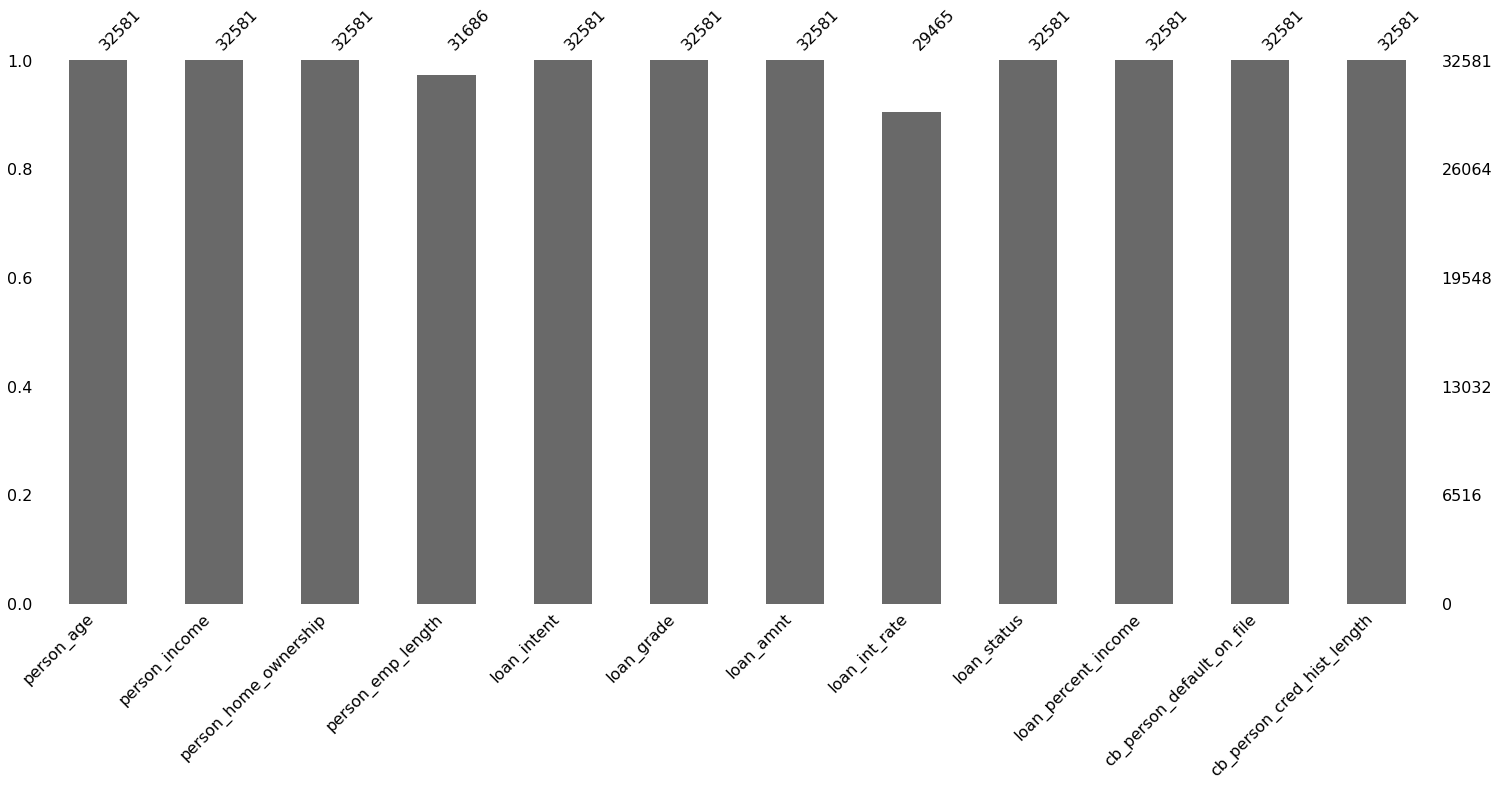

In [6]:
msno.bar(df)

In [2]:
df = df[df.isna().any(axis=1)]

NameError: name 'df' is not defined

In [53]:
X = df[['person_age', 'person_income', 'loan_int_rate']]
y = df[['loan_status']]
X_train, X_test, y_train, y_test = sk.train_test_split(X, y, test_size=X.shape[0]//5, random_state=1)

In [54]:
y_test.shape

(788, 1)

In [55]:
clf_logistic.fit(X_train, np.ravel(y_train))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').